In [2]:
%load_ext autoreload
%autoreload 2

In [39]:
import pandas as pd
import sys
sys.path.append('.')
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 100)

from helpers import DatasetCreator
from pipeline import vectorizer_pipe

### Load labelled data

In [40]:
df = pd.read_csv('all_reddit_labelled.csv')

Create dataset containing the following labels for training / prediction:

In [41]:
TARGET = 'label'
LABELS = ['screeners', 
          'bad test', 
          'ratings', 
          'recorder', 
          'live convo', 
          'no test', 
          'mobile', 
          'bug', 
          'payment']

In [42]:
creator = DatasetCreator(cols_to_drop_na=TARGET, train=True, labels=LABELS)
data = creator.transform(df)

### Train/Test split
This is time series data, so we do train/test split by time instead of random selection.

In [56]:
train_size = 0.8
n_train = int(len(data)*train_size)

In [58]:
train_df, test_df = data.iloc[:n_train, :], data.iloc[n_train:, :]

In [60]:
y_train = train_df[TARGET]
X_train = train_df.drop(columns=TARGET, axis=1)
    
vectorizer_pipe.fit(X_train, y_train)
X_train = vectorizer_pipe.transform(X_train)

In [61]:
y_test = test_df[TARGET]
X_test = test_df.drop(columns=TARGET, axis=1)

X_test = vectorizer_pipe.transform(X_test)

In [68]:
from sklearn.linear_model import RidgeClassifier

In [69]:
model = RidgeClassifier()
model.fit(X_train, y_train)

RidgeClassifier()

In [70]:
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    bad test       0.58      0.74      0.65        19
         bug       0.75      0.38      0.50         8
  live convo       0.86      0.92      0.89        13
      mobile       0.92      0.80      0.86        15
     no test       0.40      0.50      0.44         4
     payment       1.00      0.17      0.29         6
     ratings       0.64      0.69      0.67        13
    recorder       0.65      0.76      0.70        17
   screeners       0.64      0.64      0.64        11

    accuracy                           0.69       106
   macro avg       0.72      0.62      0.63       106
weighted avg       0.72      0.69      0.68       106



In [74]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [103]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    bad test       0.52      0.58      0.55        19
         bug       1.00      0.12      0.22         8
  live convo       0.86      0.92      0.89        13
      mobile       0.92      0.80      0.86        15
     no test       0.25      0.50      0.33         4
     payment       1.00      0.17      0.29         6
     ratings       0.73      0.85      0.79        13
    recorder       0.65      0.65      0.65        17
   screeners       0.56      0.82      0.67        11

    accuracy                           0.66       106
   macro avg       0.72      0.60      0.58       106
weighted avg       0.72      0.66      0.64       106



In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [87]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    bad test       0.47      0.42      0.44        19
         bug       0.56      0.62      0.59         8
  live convo       0.86      0.92      0.89        13
      mobile       1.00      0.73      0.85        15
     no test       0.30      0.75      0.43         4
     payment       1.00      0.17      0.29         6
     ratings       0.83      0.77      0.80        13
    recorder       0.56      0.53      0.55        17
   screeners       0.56      0.82      0.67        11

    accuracy                           0.64       106
   macro avg       0.68      0.64      0.61       106
weighted avg       0.69      0.64      0.64       106



In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
from sklearn.metrics import confusion_matrix

In [104]:
features = vectorizer_pipe.named_steps['vectorizer'].get_feature_names()

In [105]:
pd.DataFrame(zip(features, model.feature_importances_), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)[:100]

,feature,importance
1031,screener,0.030674
915,rating,0.022194
639,live,0.021894
1205,test,0.018162
62,app,0.018032
1138,star,0.015682
951,recorder,0.011866
823,payment,0.011587
1399,upload,0.011500
999,review,0.011462


Text(87.0, 0.5, 'True Label')

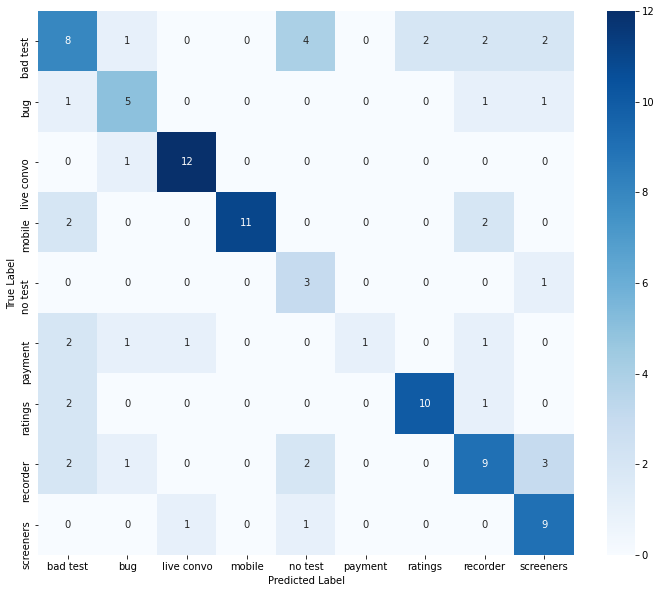

In [91]:
cf = confusion_matrix(y_test, y_pred, labels=model.classes_)
df_cf = pd.DataFrame(cf, columns=model.classes_, index=model.classes_)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_cf, ax=ax, annot=True, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')